<a href="https://colab.research.google.com/github/tayfununal/Artificial-Neural-Network-with-One-Hidden-Layer/blob/main/new_revision_without_baski.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
!pip install playground-data

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [81]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plygdata as pg
import json
import requests

In [82]:
pg.dataset.random.seed(8)
Datas = pg.dataset.DataGenerator.classify_circle(1000,noise=0.1)

In [83]:
def initialization_parameters(x, y, num_node, random_seeds_one, random_seeds_two):
    np.random.seed(random_seeds_one)
    W1 = np.random.randn(num_node * x.shape[0]).reshape(num_node, x.shape[0])
    b1 = np.zeros((num_node, 1))

    np.random.seed(random_seeds_two)
    W2 = np.random.randn(y.shape[0], num_node)
    b2 = np.zeros((y.shape[0], 1))

    assert W1.shape == (num_node, x.shape[0])
    assert b1.shape == (num_node, 1)

    assert W2.shape == (y.shape[0], num_node)
    assert b2.shape == (y.shape[0], 1)

    parameters = {'W1': W1,
                  'b1': b1,
                  'W2': W2,
                  'b2': b2}
    return parameters

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def relu(x):
    return np.maximum(0, x)


def reluDerivative(x):
    x[x <= 0] = 0
    x[x > 0] = 1
    return x

def forward_prop(x, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    Z1 = np.dot(W1, x) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    assert (A2.shape == (1, x.shape[1]))
    cache = {
        'Z1': Z1,
        'A1': A1,
        'Z2': Z2,
        'A2': A2
    }
    return A2, cache

def backward_prop(x, y, parameters, cache, learning_rate=0.1):
    m = y.shape[1]

    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    A1 = cache['A1']
    A2 = cache['A2']

    # Calculations of backward propagation: dW1, db1, dW2, db2
    dZ2 = A2 - y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)

    dZ1 = np.multiply(np.dot(W2.T, dZ2), reluDerivative(A1))
    dW1 = (1 / m) * np.dot(dZ1, x.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)

    # Updating parameters
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    parameters = {'W1': W1,
                  'b1': b1,
                  'W2': W2,
                  'b2': b2}
    return parameters

def cross_entropy_cost(y, A2, parameters):
    m = y.shape[1]

    W1 = parameters["W1"]
    W2 = parameters["W2"]

    cross_entropy = np.multiply(np.log(A2 + 1e-15), y) + np.multiply((1 - y), np.log(1 - A2 + 1e-15))
    cost = (- 1.0 / m) * np.sum(cross_entropy)

    # Squeezing to avoid unnecessary dimensions
    cost = np.squeeze(cost)
    return cost

In [84]:
def nn_model(x, y, parameters, number_of_iter=1000):
    A2, cache = forward_prop(x, parameters)
    cost = cross_entropy_cost(y, A2, parameters)
    cost_history = []
    cost_history.append(cost)

    for i in range(1, number_of_iter):
        parameters = backward_prop(x, y, parameters, cache, learning_rate=0.6)
        A2, cache = forward_prop(x, parameters)
        cost = cross_entropy_cost(y, A2, parameters)
        cost_history.append(cost)
    return cost, parameters, cost_history

In [85]:
df = pd.DataFrame(Datas)
df = df.sample(frac=1,random_state=1).reset_index(drop=True)
df.loc[df.loc[:,2] ==-1,2]=0 #change the label which is 0 to -1
# pd.set_option('display.max_rows', df.shape[0] + 1) ---> showing all row

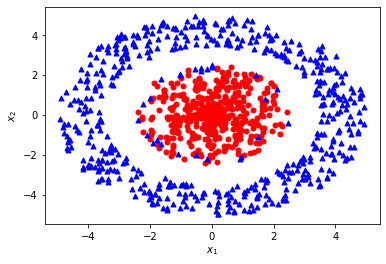

In [86]:
df1 = df[df[2] == 1]
df2 = df[df[2] == 0]

ax = df1.plot.scatter(0 ,1 , s=25, c="red")
df2.plot.scatter(0, 1, s=25, c="blue", ax=ax, marker="^")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

In [87]:
X = np.array(df[[0,1]]).T
Y = np.array(df[[2]]).T

In [88]:
np.random.seed(65468)

In [89]:
sonuc_parameters=[]
sonuc_cost=[]
for i in range(1,21):
  number_of_neuron = i
  parameters = initialization_parameters(X, Y, number_of_neuron, int(1), int(1))
  print(parameters)
  cost, parameters, cost_history = nn_model(X, Y, parameters, number_of_iter=1000)
  sonuc_cost.append(cost)
  sonuc_parameters.append(parameters)

{'W1': array([[ 1.62434536, -0.61175641]]), 'b1': array([[0.]]), 'W2': array([[1.62434536]]), 'b2': array([[0.]])}
{'W1': array([[ 1.62434536, -0.61175641],
       [-0.52817175, -1.07296862]]), 'b1': array([[0.],
       [0.]]), 'W2': array([[ 1.62434536, -0.61175641]]), 'b2': array([[0.]])}
{'W1': array([[ 1.62434536, -0.61175641],
       [-0.52817175, -1.07296862],
       [ 0.86540763, -2.3015387 ]]), 'b1': array([[0.],
       [0.],
       [0.]]), 'W2': array([[ 1.62434536, -0.61175641, -0.52817175]]), 'b2': array([[0.]])}
{'W1': array([[ 1.62434536, -0.61175641],
       [-0.52817175, -1.07296862],
       [ 0.86540763, -2.3015387 ],
       [ 1.74481176, -0.7612069 ]]), 'b1': array([[0.],
       [0.],
       [0.],
       [0.]]), 'W2': array([[ 1.62434536, -0.61175641, -0.52817175, -1.07296862]]), 'b2': array([[0.]])}
{'W1': array([[ 1.62434536, -0.61175641],
       [-0.52817175, -1.07296862],
       [ 0.86540763, -2.3015387 ],
       [ 1.74481176, -0.7612069 ],
       [ 0.3190391 , -0.

In [90]:
sonuc_cost

[0.5707050868778757,
 0.3821717732750886,
 0.06487906341454949,
 0.06316316673689418,
 0.05893558577762479,
 0.056069308034207566,
 0.05364624999927584,
 0.053522604956811305,
 0.05351072433732369,
 0.052366342614411865,
 0.05268470051313941,
 0.05309880370731775,
 0.05309836857903709,
 0.05230276486562032,
 0.05229404419759865,
 0.05222533965245061,
 0.0516125160373609,
 0.05038276242123647,
 0.0504294724610796,
 0.05034925787824088]

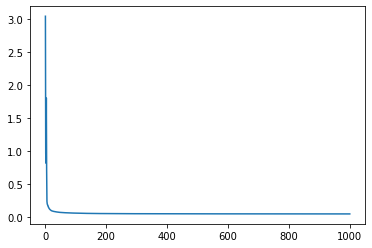

In [91]:
x = np.arange(1,1001)
plt.plot(x, cost_history)

In [92]:
parameters

{'W1': array([[ 1.59664091, -0.29574145],
        [-0.99490824, -0.95206798],
        [ 0.46136832, -2.41589227],
        [ 1.99598146, -0.18537403],
        [ 0.11288863, -0.22261527],
        [ 1.70190699, -1.49306506],
        [ 0.06089224, -0.48138627],
        [ 1.17423782, -0.9192129 ],
        [-0.24006356, -0.86031564],
        [-0.08888182,  0.97920853],
        [-0.79924628,  0.828682  ],
        [ 0.94950887,  1.60257274],
        [ 0.84146837, -0.65768622],
        [-0.1118361 , -1.0459093 ],
        [-0.04118216,  0.02735934],
        [-1.24859568, -0.25157246],
        [-0.82455138, -0.81670882],
        [-1.30759273,  0.61021518],
        [-1.23461263,  0.25301279],
        [ 1.51180143,  0.65168936]]),
 'W2': array([[ 1.88706587, -1.01891864, -0.83614167, -1.54006535,  1.27714221,
         -1.98230381,  2.79234985, -0.69670626,  0.41514463, -0.84742242,
          1.22258941, -2.51951399, -0.32072366, -0.70752711,  1.158485  ,
         -1.49565171, -0.51864964, -1.657452

In [93]:
cost_history[-1]

0.05034925787824088

In [94]:
cost

0.05034925787824088

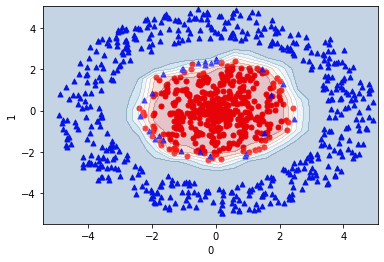

In [95]:
def plot_decision_boundary(X, Y, cmap='RdBu_r'):

  h = 0.5
  x_min, x_max = X[0,:].min() - h, X[0,:].max() + h
  y_min, y_max = X[1,:].min() - h, X[1,:].max() + h
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
  A2, cache = forward_prop(np.c_[xx.ravel(), yy.ravel()].T, parameters)
  A2 = A2.reshape(xx.shape)
  
  ax = df1.plot.scatter(0 ,1 , s=25, c="red", cmap=cmap)
  df2.plot.scatter(0, 1, s=25, c="blue", ax=ax, marker="^", cmap=cmap)
  
  ax.contourf(xx, yy, A2, cmap=cmap, alpha=0.25)
  ax.contour(xx, yy, A2, colors='k', linewidths=0.1)

plot_decision_boundary(X, Y)